In [3]:


#First import all the libraries needed

import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection  import GridSearchCV  # for tuning parameters
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time

In [4]:
#load data
data = pd.read_csv("data.csv")

In [5]:
#to know the number of cases and the number of variables
data.shape

(569, 32)

In [6]:
#Description of the dataset

#how many cases are included in the dataset
length = len(data)
#how many features are in the dataset
features = data.shape[1]-1

# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])

#Number of benign cases
benign = len(data[data['diagnosis']=='B'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print ("There are "+ str(len(data))+" cases in this dataset")
print ("There are {}".format(features)+" features in this dataset")
print ("There are {}".format(malignant)+" cases diagnosed as malignant tumor")
print ("There are {}".format(benign)+" cases diagnosed as benign tumor")
print ("The percentage of malignant cases is: {:.4f}%".format(rate))

There are 569 cases in this dataset
There are 31 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583%


In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
#drop ID because we do not need the ID number as shown above

data.drop('id',axis=1,inplace=True)
#check that dropped
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [9]:
# Extract feature columns where everything but the diagnosis is included.
# I am separating all the features that are helpful in determining the diagnosis
features = list(data.columns[1:30])
print (features)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [10]:
#Our target is predicting the diagnosis in benign or malignant, so we need
#to extract this one as the dependent variable - the variable we will predict
target = data.columns[0:1]
print (target)

Index(['diagnosis'], dtype='object')


In [11]:
#Now we need to separate the data into feature data and target data
X = data[features] #our features that we will use to predict Y
Y = data[target] #our dependent variable, the one we are trying to predict from X

In [12]:
# X should have 29 variables and 569 cases
X.shape

(569, 29)

In [13]:
# Y should have 1 variable - just the diagnosis and 569 cases
Y.shape

(569, 1)

In [14]:
# Show the feature information by printing the first row
# Show the traget information by also printing the first row
print ("\nFeature values:")
print (X.head(1))
print ("\nTarget values:")
print (Y.head(1))


Feature values:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0           0.1184   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.2776          0.3001               0.1471         0.2419   

   fractal_dimension_mean  ...  fractal_dimension_se  radius_worst  \
0                 0.07871  ...              0.006193         25.38   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33            184.6      2019.0            0.1622   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  
0             0.6656           0.7119                0.2654          0.4601  

[1 rows x 29 columns]

Target values:
  diagnosis
0         M


In [15]:
df=pd.DataFrame(data)

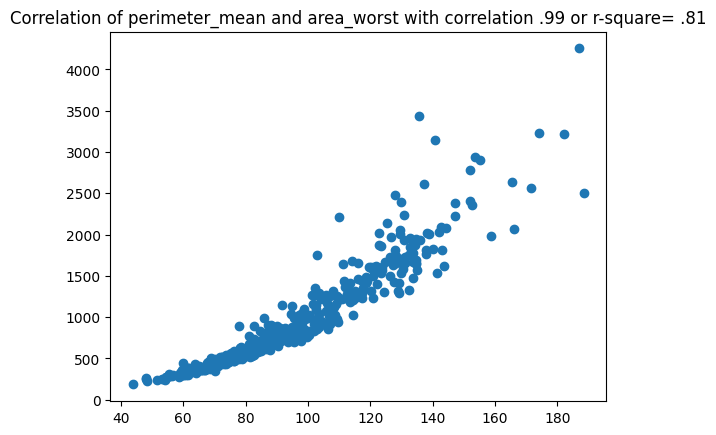

In [16]:
#Research shows that any variables that are highly correlated
#should be removed from further analysis. But, PCA takes care of multicollinearity, so maybe 
#I identify them which ones there are and let PCA to do its job.  
#Just in case let's see how two highly correlated variables look like
#using prettyplots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['perimeter_mean']
    y=df['area_worst']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of perimeter_mean and area_worst with correlation .99 or r-square= .81')
fig.savefig('scatter.png')

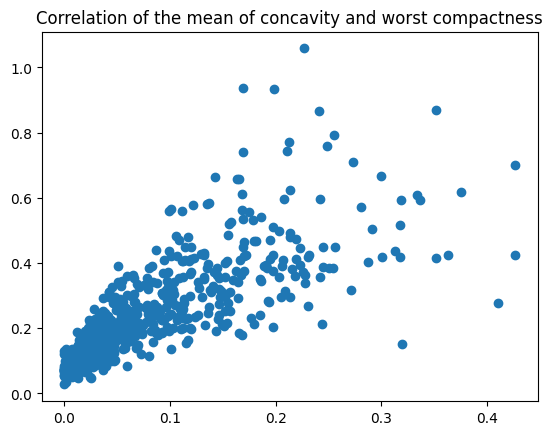

In [17]:
#Let's visualize another set of variables that are not correlated as highly as the first ones
#These have a correlation coefficient of .75 which means an r-squared score of approximately .49
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['concavity_mean']
    y=df['compactness_worst']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of the mean of concavity and worst compactness')
fig.savefig('scatter.png')

In [26]:
def preprocess_features(X):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():
        
        # If data type is non-numeric, replace all M/B malignant/benign values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['M', 'B'], [1, 0])
 
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X = preprocess_features(X)
Y = preprocess_features(Y)
print ("Processed feature columns ({} total features):\n{}".format(len(X.columns), list(X.columns)))
print ("Target columns ({} total features):\n{}".format(len(Y.columns), list(Y.columns)))

Processed feature columns (29 total features):
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']
Target columns (1 total features):
['diagnosis']


In [27]:
# import cross_validation to split the train and testing
from sklearn.model_selection  import train_test_split
# Set the number of training points
nr_train = 300
# Set the number of testing points
nr_test = X.shape[0] - nr_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=nr_test, random_state=40)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 269 samples.


In [33]:
from sklearn.metrics import f1_score
def train_classifier(clf, X_train, Y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, Y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    Y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, Y_pred, pos_label=1)


def train_predict(clf, X_train, Y_train, X_test, Y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, Y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, Y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, Y_test)))

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


In [35]:
clf_A = KNeighborsClassifier()
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = SVC()
clf_D = GaussianNB()
clf_E = RandomForestClassifier(n_estimators=10)
clf_G = AdaBoostClassifier()
clf_H = QuadraticDiscriminantAnalysis()
clf_I = MLPClassifier(alpha=1)


In [36]:
X_train_100 = X_train[:100]
Y_train_100 = Y_train[:100]

X_train_200 = X_train[:200]
Y_train_200 = Y_train[:200]

X_train_300 = X_train[:300]
Y_train_300 = Y_train[:300]

X_train_300 = X_train[:400]
Y_train_300 = Y_train[:400]


In [37]:
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_G, clf_H, clf_I]:
    for size in [300, 400]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print ()

Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0150 seconds.
F1 score for training set: 0.9264.
Made predictions in 0.0150 seconds.
F1 score for test set: 0.9081.

Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0140 seconds.
F1 score for training set: 0.9264.
Made predictions in 0.0130 seconds.
F1 score for test set: 0.9081.

Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0080 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.9239.

Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0060 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9239.

Training a SVC using a training 

c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-ca

Trained model in 0.0940 seconds
Made predictions in 0.0070 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.9451.

Training a AdaBoostClassifier using a training set size of 300. . .
Trained model in 0.0920 seconds
Made predictions in 0.0070 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.9451.

Training a QuadraticDiscriminantAnalysis using a training set size of 300. . .
Trained model in 0.0050 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9528.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9688.

Training a QuadraticDiscriminantAnalysis using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9528.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9688.

Training a MLPClassifier using a training set size of 300. . .


c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\v

Trained model in 0.1530 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9145.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8973.

Training a MLPClassifier using a training set size of 300. . .
Trained model in 0.1070 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9163.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9000.



c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
clf_D = GaussianNB()
clf_G = AdaBoostClassifier(algorithm = 'SAMME')
clf_H = QuadraticDiscriminantAnalysis(reg_param = 0.001, store_covariance=True, tol = 0.01)

In [39]:
X_train_300 = X_train[:300]
Y_train_300 = Y_train[:300]

X_train_300 = X_train[:400]
Y_train_300 = Y_train[:400]

In [40]:
for clf in [clf_D, clf_G, clf_H]:
    for size in [300, 400]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print ()

Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9058.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.9341.

Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0030 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.9058.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9341.

Training a AdaBoostClassifier using a training set size of 300. . .
Trained model in 0.0940 seconds
Made predictions in 0.0060 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0060 seconds.
F1 score for test set: 0.9570.

Training a AdaBoostClassifier using a training set size of 300. . .


c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-

Trained model in 0.0900 seconds
Made predictions in 0.0060 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0060 seconds.
F1 score for test set: 0.9570.

Training a QuadraticDiscriminantAnalysis using a training set size of 300. . .
Trained model in 0.0030 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9381.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.9574.

Training a QuadraticDiscriminantAnalysis using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.9381.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9574.



c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are

In [41]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# from scipy import interp


In [42]:
Y_test.shape

(269, 1)

In [43]:
from sklearn.datasets import make_classification

In [50]:
from sklearn import metrics
import pandas as pd
from ggplot import *

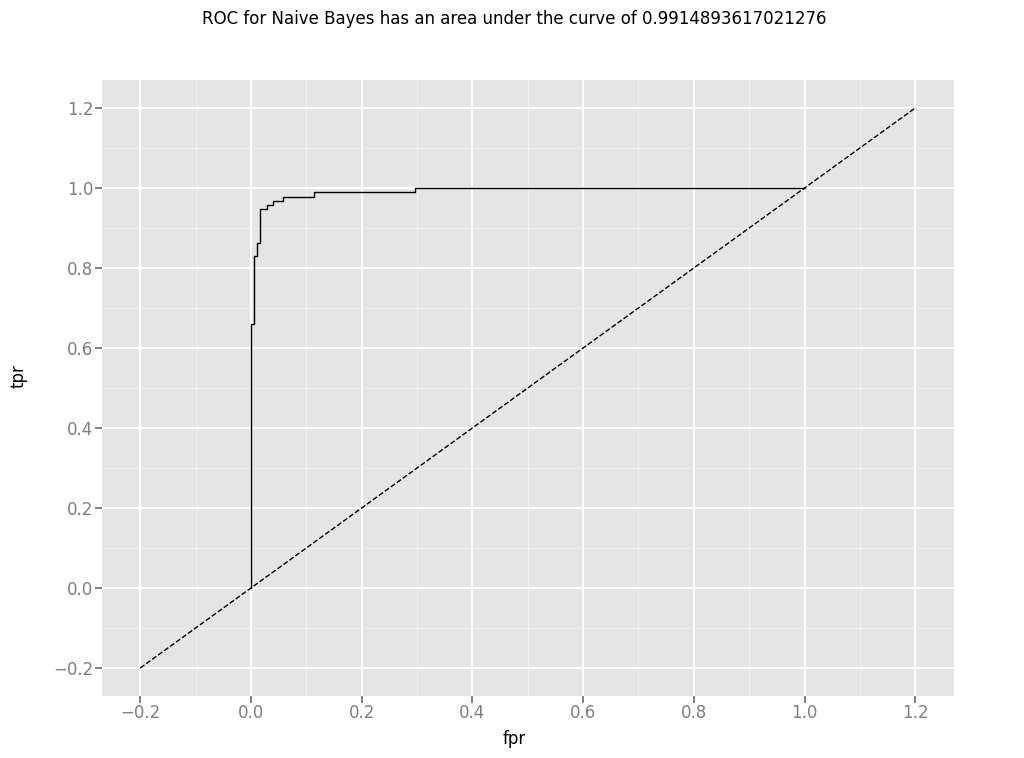

<ggplot: (110764538742)>

In [51]:
# ROC curve for Naive Bayes
preds = clf_D.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for Naive Bayes has an area under the curve of " + str(metrics.auc(fpr,tpr)))
#auc = metrics.auc(fpr,tpr)
#ggtitle ("Area under the curve is "+ str(auc))
#ggtitle("ROC Curve w/ AUC=%s" % str(auc))

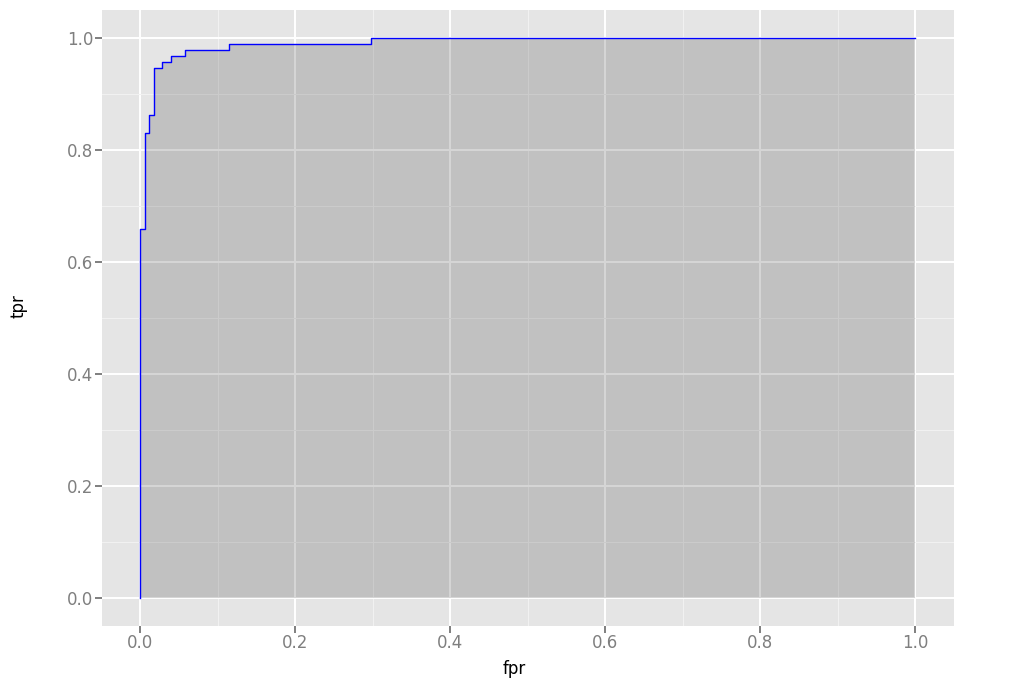

<ggplot: (110764538418)>

In [52]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', y='tpr')) + geom_area(alpha=0.2) + geom_line(aes(y='tpr', color = 'blue'))


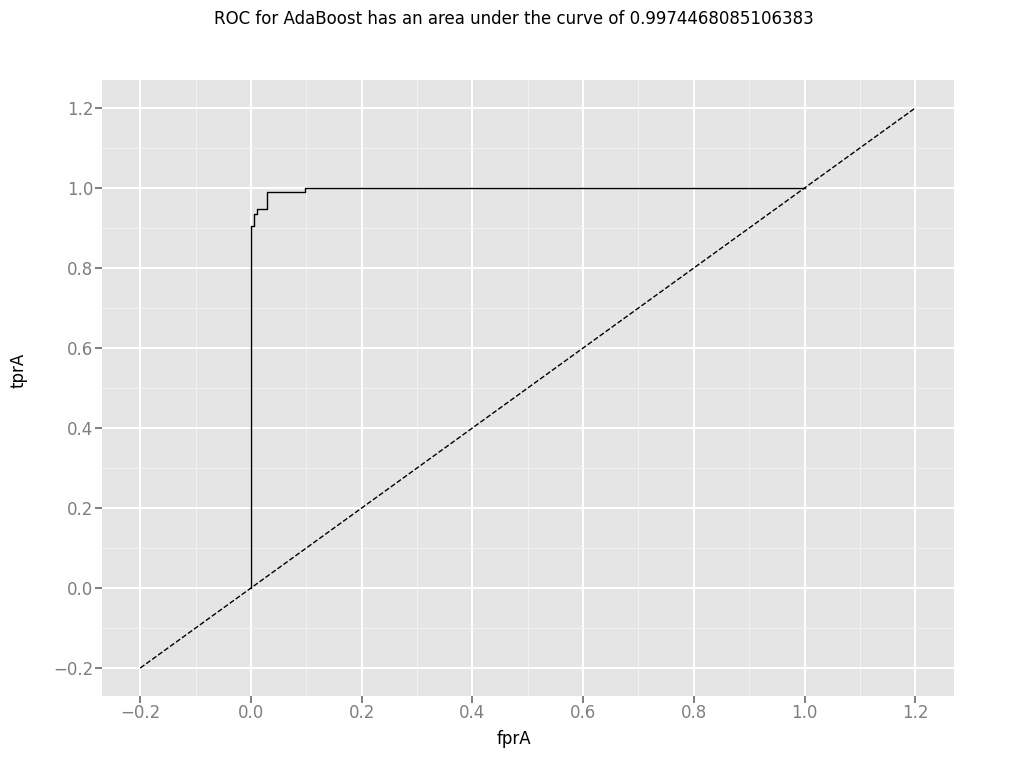

<ggplot: (110762197575)>

In [53]:
# ROC curve for AdaBoost
preds = clf_G.predict_proba(X_test)[:,1]
fprA, tprA, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprA=fprA, tprA=tprA))
ggplot(df, aes(x='fprA', y='tprA')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for AdaBoost has an area under the curve of " + str(metrics.auc(fprA,tprA)))
    

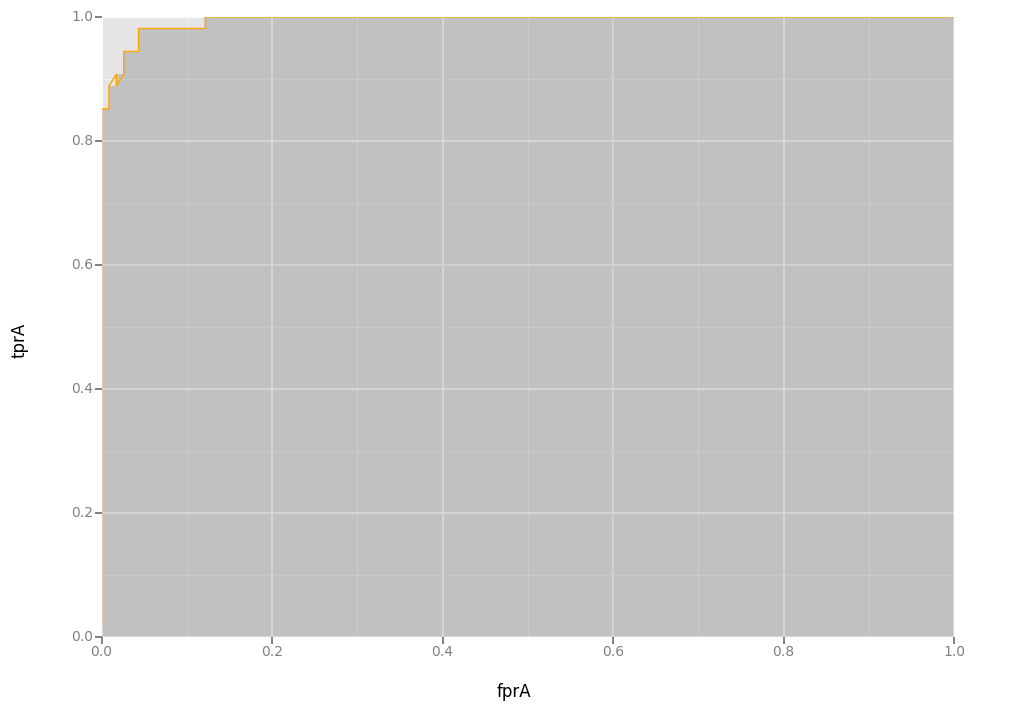

<ggplot: (301939085)>

In [124]:
auc = metrics.auc(fprA,tprA)
ggplot(df, aes(x='fprA', y='tprA')) + geom_area(alpha=0.2) + geom_line(aes(y='tprA', colour = 'orange'))


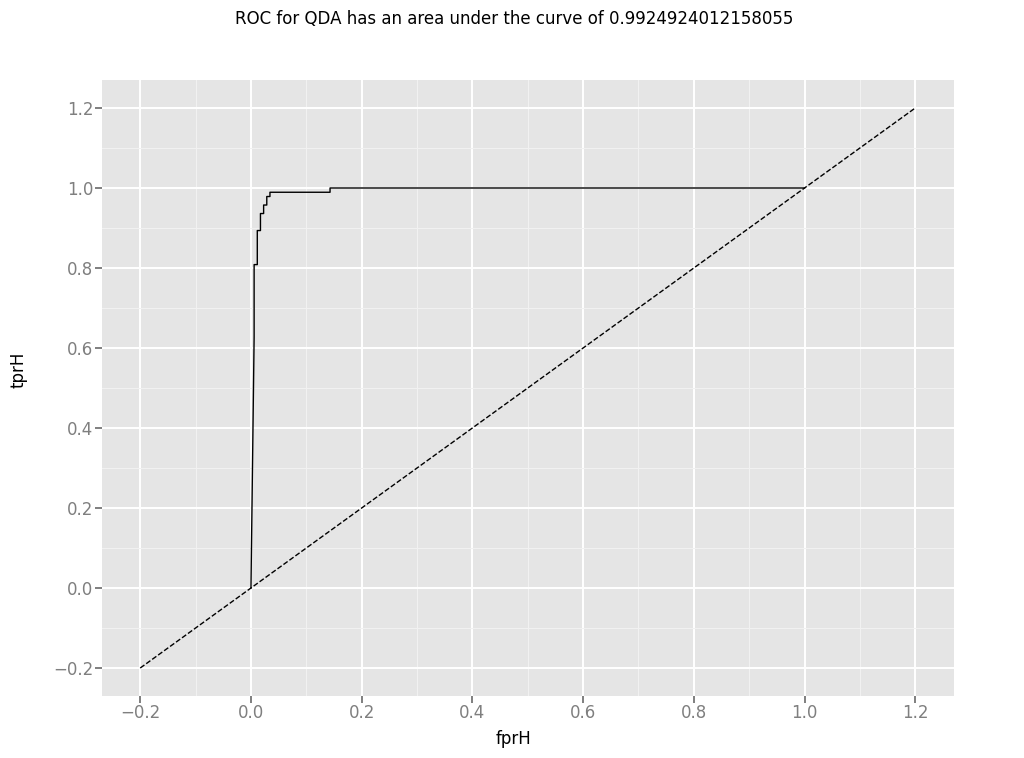

<ggplot: (110764601272)>

In [54]:
# ROC curve for QDA
preds = clf_H.predict_proba(X_test)[:,1]
fprH, tprH, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprH=fprH, tprH=tprH))
ggplot(df, aes(x='fprH', y='tprH')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for QDA has an area under the curve of " + str(metrics.auc(fprH,tprH)))

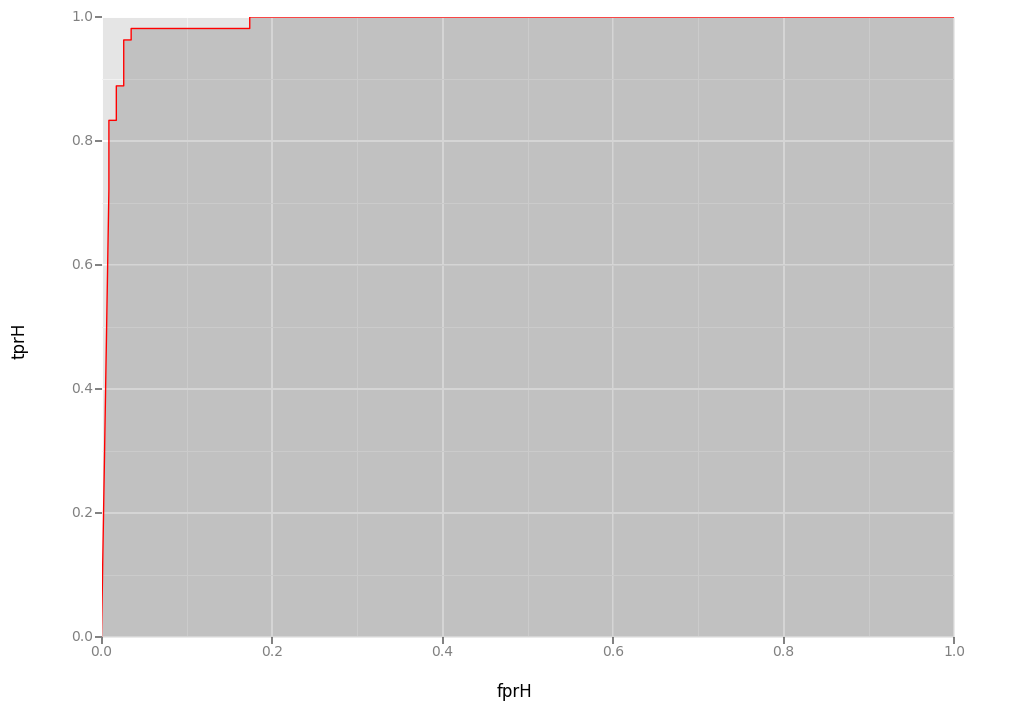

<ggplot: (304400941)>

In [132]:
auc = metrics.auc(fprH,tprH)
ggplot(df, aes(x='fprH', y='tprH')) + geom_area(alpha=0.2) + geom_line(aes(y='tprH', color = 'red'))


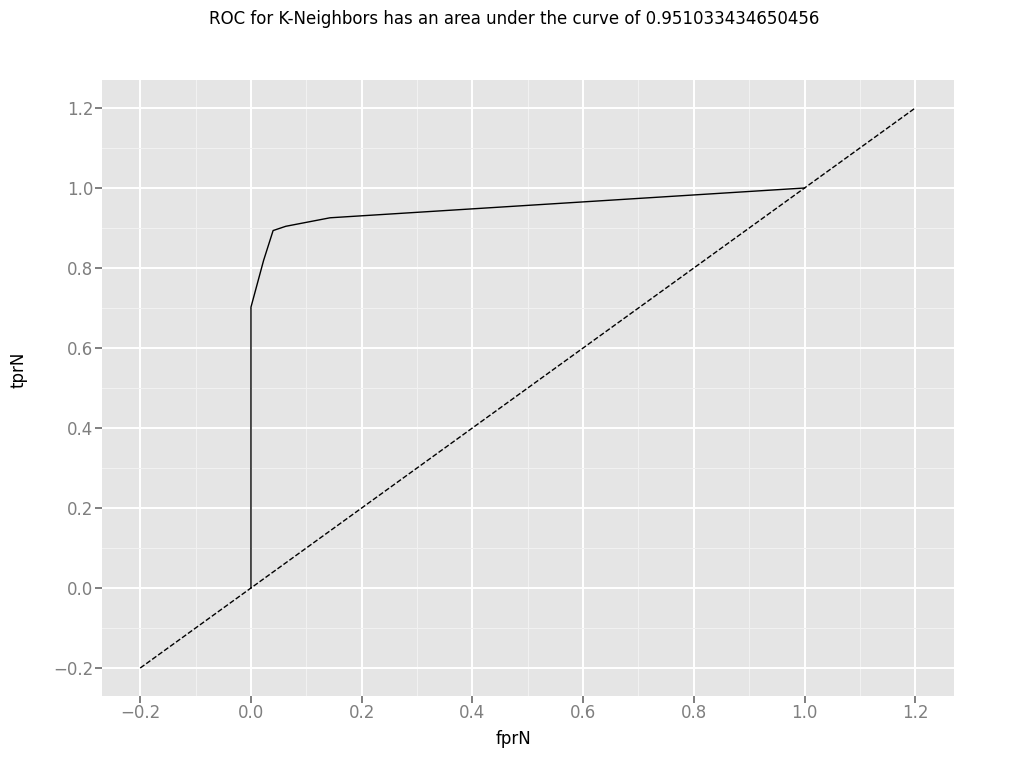

<ggplot: (110764538166)>

In [55]:
# ROC curve for K-Neighbors
preds = clf_A.predict_proba(X_test)[:,1]
fprN, tprN, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprN=fprN, tprN=tprN))
ggplot(df, aes(x='fprN', y='tprN')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for K-Neighbors has an area under the curve of " + str(metrics.auc(fprN,tprN)))

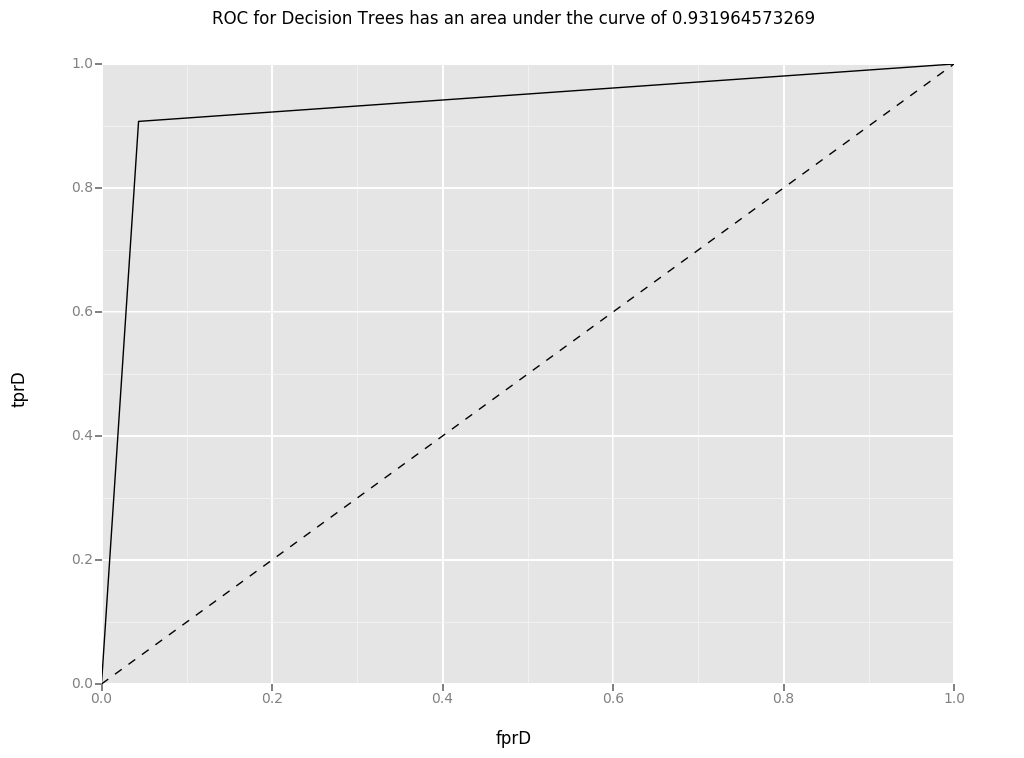

<ggplot: (309199065)>

In [191]:
# ROC curve for Decision trees
preds = clf_B.predict_proba(X_test)[:,1]
fprD, tprD, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprD=fprD, tprD=tprD))
ggplot(df, aes(x='fprD', y='tprD')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for Decision Trees has an area under the curve of " + str(metrics.auc(fprD,tprD)))

In [57]:
# Set the number of training points much smaller than before
nr_train = 50
# Set the number of testing points
nr_test = X.shape[0] - nr_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=nr_test, random_state=40)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 50 samples.
Testing set has 519 samples.


In [58]:
for clf in [clf_D, clf_G, clf_H]:
    for size in [50]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print ()

Training a GaussianNB using a training set size of 50. . .
Trained model in 0.0030 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9302.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9162.

Training a AdaBoostClassifier using a training set size of 50. . .
Trained model in 0.0550 seconds
Made predictions in 0.0100 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0110 seconds.
F1 score for test set: 0.9171.

Training a QuadraticDiscriminantAnalysis using a training set size of 50. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9076.



c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-

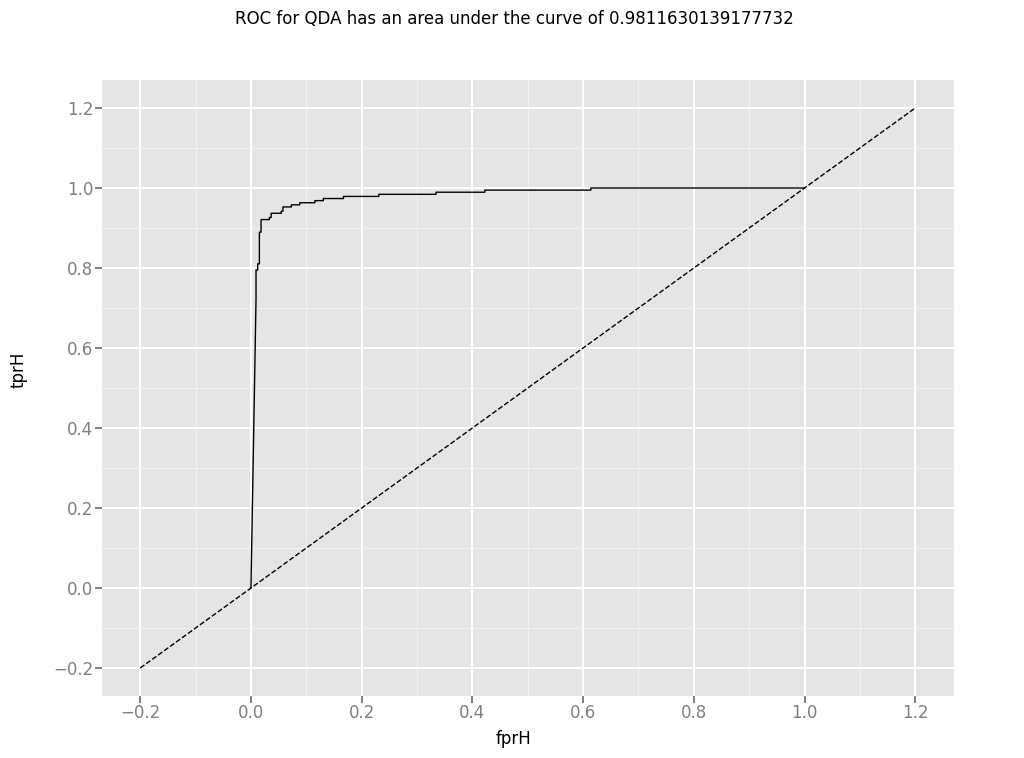

<ggplot: (110764663757)>

In [59]:
# ROC curve for QDA
preds = clf_H.predict_proba(X_test)[:,1]
fprH, tprH, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprH=fprH, tprH=tprH))
ggplot(df, aes(x='fprH', y='tprH')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for QDA has an area under the curve of " + str(metrics.auc(fprH,tprH)))

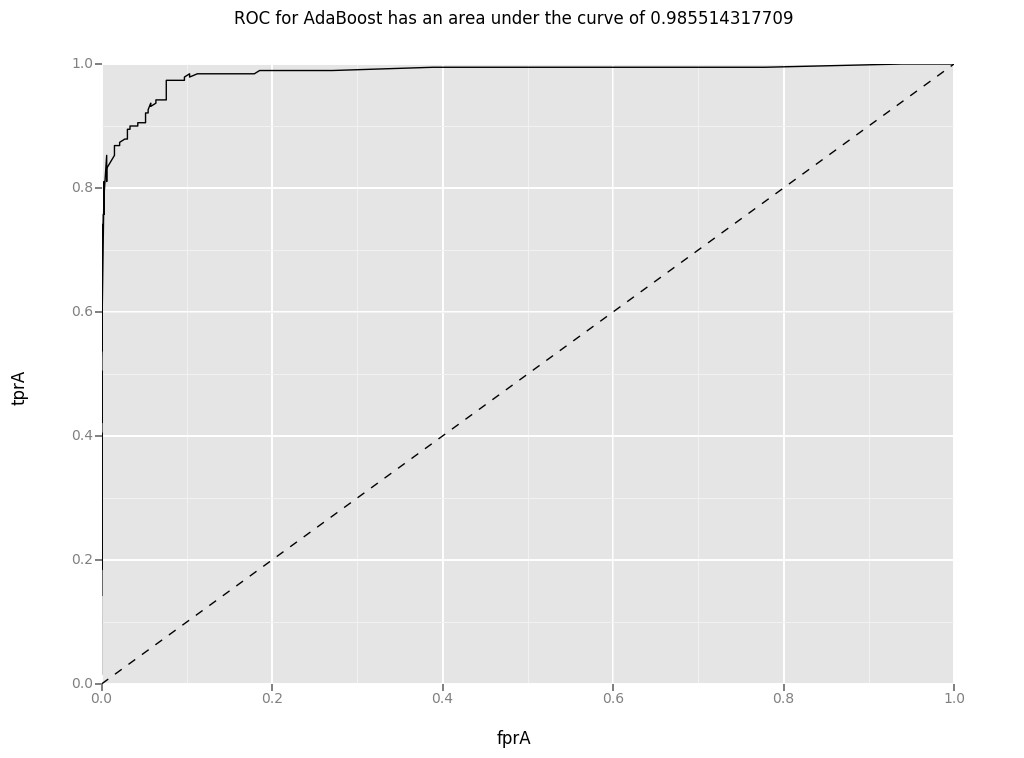

<ggplot: (310090285)>

In [201]:
# ROC curve for AdaBoost
preds = clf_G.predict_proba(X_test)[:,1]
fprA, tprA, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprA=fprA, tprA=tprA))
ggplot(df, aes(x='fprA', y='tprA')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for AdaBoost has an area under the curve of " + str(metrics.auc(fprA,tprA)))
    

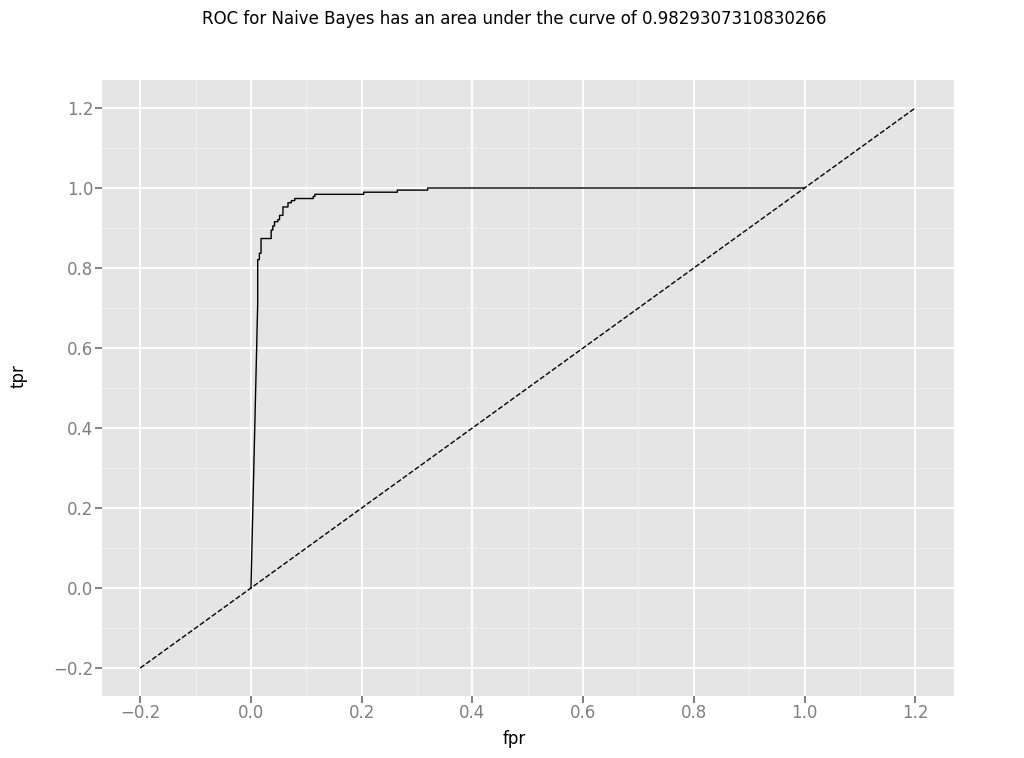

<ggplot: (110764727522)>

In [60]:
# ROC curve for Naive Bayes
preds = clf_D.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for Naive Bayes has an area under the curve of " + str(metrics.auc(fpr,tpr)))

In [61]:
# Set the number of training points much smaller than before
nr_train = 20
# Set the number of testing points
nr_test = X.shape[0] - nr_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=nr_test, random_state=40)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20 samples.
Testing set has 549 samples.


In [62]:
for clf in [clf_D, clf_G, clf_H]:
    for size in [20]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print ()

Training a GaussianNB using a training set size of 20. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8889.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9041.

Training a AdaBoostClassifier using a training set size of 20. . .
Trained model in 0.0550 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.8869.

Training a QuadraticDiscriminantAnalysis using a training set size of 20. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8184.



c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-cancer-prediction\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shreedhar Joshi\Desktop\Coding\AIML\breast-